In [1]:
#adding in new genes to analysis 7q11.23

In [2]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [3]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [4]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [5]:
#load in diffmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_diffmats.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [6]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [7]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
23


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 23/23 [00:02<00:00,  9.67it/s]


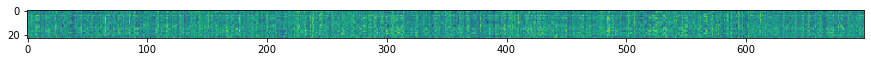

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [10]:
gene_fmri_corr.shape

(23, 699)

In [11]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

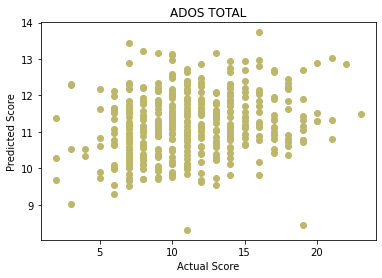

In [12]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='darkkhaki')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [13]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

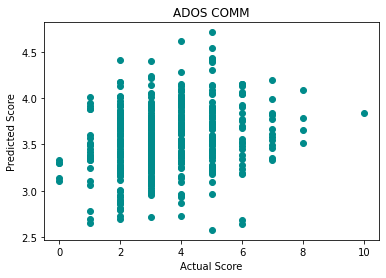

In [14]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='darkcyan')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [15]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

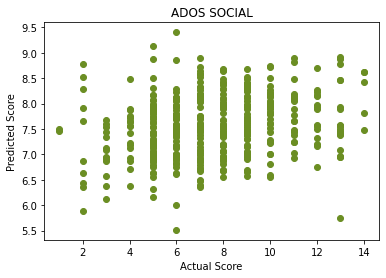

In [17]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='olivedrab')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [18]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

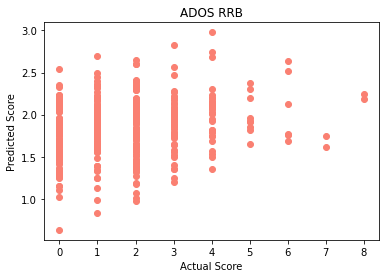

In [19]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='salmon')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [20]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

4.943865228302469


In [21]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

5.249729611598397


In [22]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

5.203061887938576


In [23]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

5.231854149877069


Text(0.5, 0, 'Symptom')

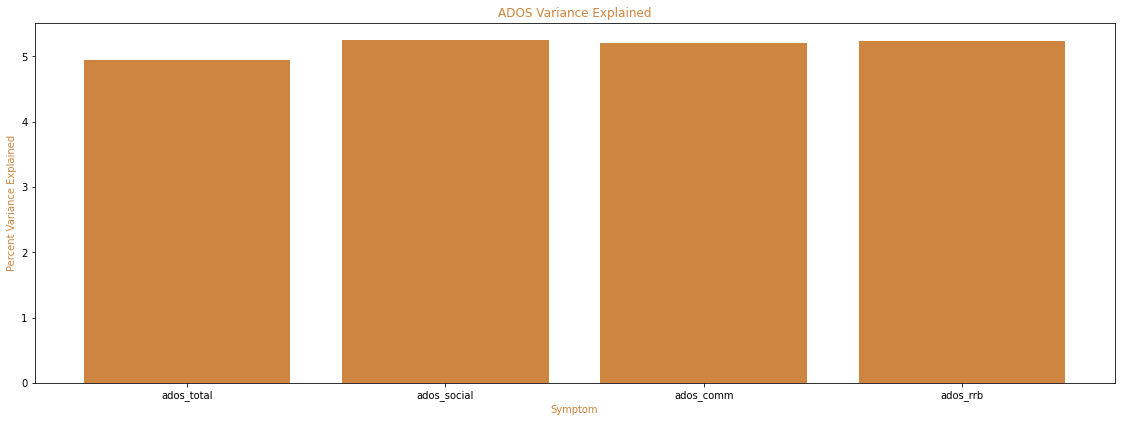

In [31]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='peru')
plt.title('ADOS Variance Explained',color='peru')
plt.ylabel('Percent Variance Explained',color='peru')
plt.xlabel('Symptom',color='peru')

In [32]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['CLDN4','CLDN3','ELN','TBL2','GTF2I','MLXIPL','LIMK1','ABHD11','DNAJC30','RFC2','STX1A','EIF4H','CLIP2','LAT2','WBSCR22','WBSCR28','WBSCR27','VPS37D','FZ9D','FKBP6','BAZ1B','BCL7B','GTFIRD1']
print(column_total)
print()
for i in range(0,24):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

CLDN4,-3.6047430091056407
CLDN3,2.0318938376824014
ELN,4.790607248234447
TBL2,-4.324352240039906
GTF2I,0.7918326807154609
MLXIPL,-2.3286113239688384
LIMK1,0.3446871163745011
ABHD11,-2.389276238477003
DNAJC30,6.600476403088061
RFC2,-2.982850463421725
STX1A,6.559468948206465
EIF4H,4.263331816928466
CLIP2,-3.2105860593088154
LAT2,-0.936507409842343
WBSCR22,3.92766723917272
WBSCR28,-3.2669140933889635
WBSCR27,-4.200986377283561
VPS37D,1.8632409503656249
FZ9D,-4.711910545024296
FKBP6,7.564556322995807
BAZ1B,2.044035982806177
BCL7B,-7.291363836863946
GTFIRD1,-0.880488258185732


IndexError: list index out of range

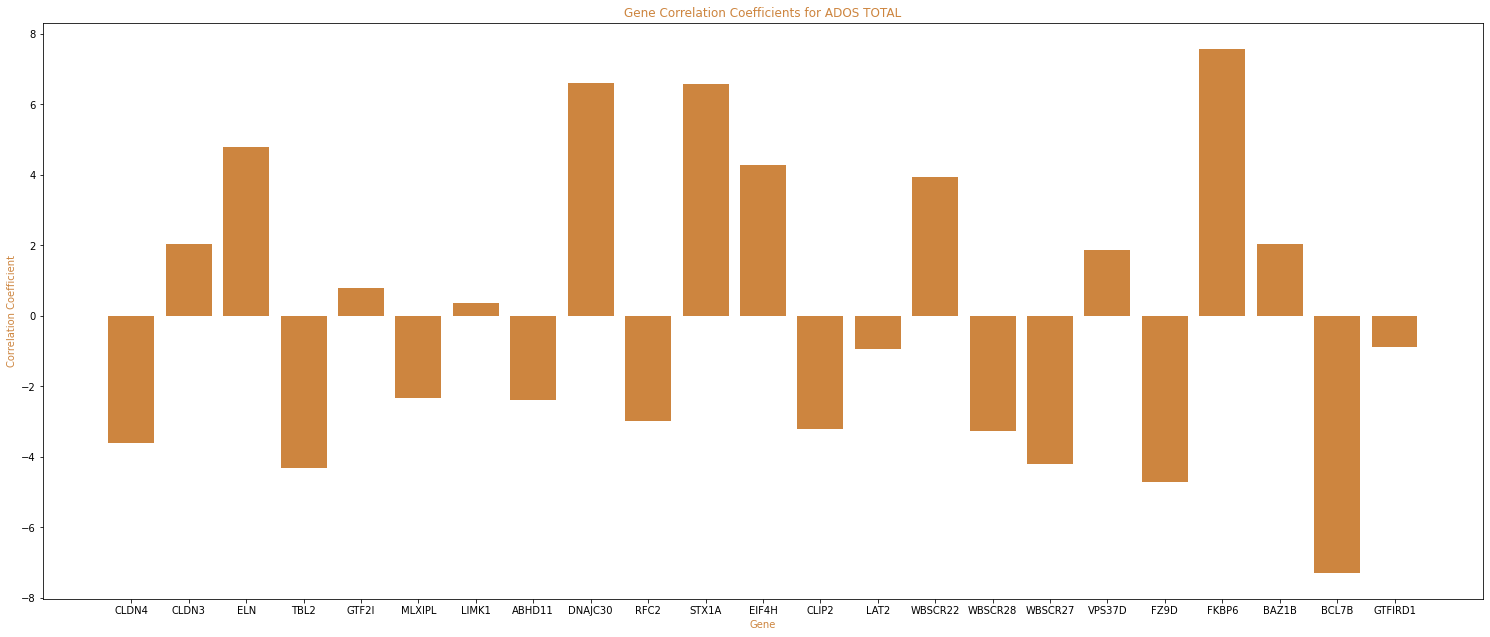

In [39]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='peru')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='peru')
plt.ylabel('Correlation Coefficient',color='peru')
plt.xlabel('Gene',color='peru')
plt.show()

In [40]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,23):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

CLDN4,-1.3423813897584598
CLDN3,-1.206750712872228
ELN,2.0244120970398924
TBL2,-1.3149916156533585
GTF2I,2.7206040239765477
MLXIPL,-2.5664420849686453
LIMK1,1.0532791287484105
ABHD11,-3.2029807099305123
DNAJC30,4.4517182169322504
RFC2,-1.1610415011500275
STX1A,3.5225189012606077
EIF4H,0.7269630734078549
CLIP2,-0.3859136678901714
LAT2,-0.7243713862832385
WBSCR22,2.92720226422308
WBSCR28,-1.6444927023272975
WBSCR27,-0.06536468613775968
VPS37D,1.0390609091136311
FZ9D,-0.45358796993282025
FKBP6,4.162759351973122
BAZ1B,-3.5918963166498363
BCL7B,-1.7989834152635857
GTFIRD1,0.9019223421584326


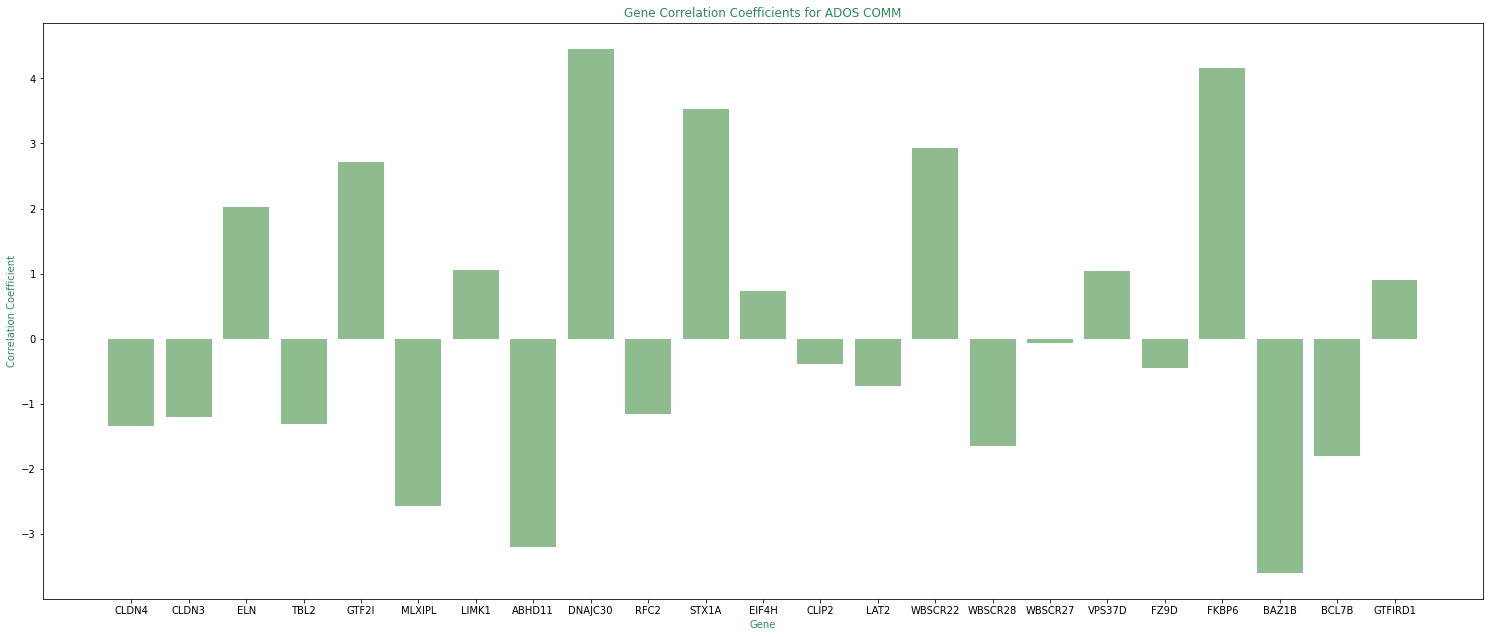

In [41]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='darkseagreen')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='seagreen')
plt.ylabel('Correlation Coefficient',color='seagreen')
plt.xlabel('Gene',color='seagreen')
plt.show()

In [42]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,23):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

CLDN4,-2.575901572187643
CLDN3,3.2673283354995784
ELN,2.6413816147754496
TBL2,-3.1014681379790145
GTF2I,0.7675695896460248
MLXIPL,0.3846298168717139
LIMK1,1.0858931308206867
ABHD11,-0.7493796889593988
DNAJC30,4.226872581297317
RFC2,-0.7197086227337227
STX1A,3.7028662394434138
EIF4H,2.003963890740609
CLIP2,-1.9185183729639028
LAT2,-2.2408819619864953
WBSCR22,-0.8863887530307967
WBSCR28,-2.1369845048245395
WBSCR27,-3.6689498469579025
VPS37D,-1.1180008778175798
FZ9D,-3.0835400460645306
FKBP6,3.5339792699777717
BAZ1B,5.406825264378063
BCL7B,-5.117407642612834
GTFIRD1,-0.5219837673010534


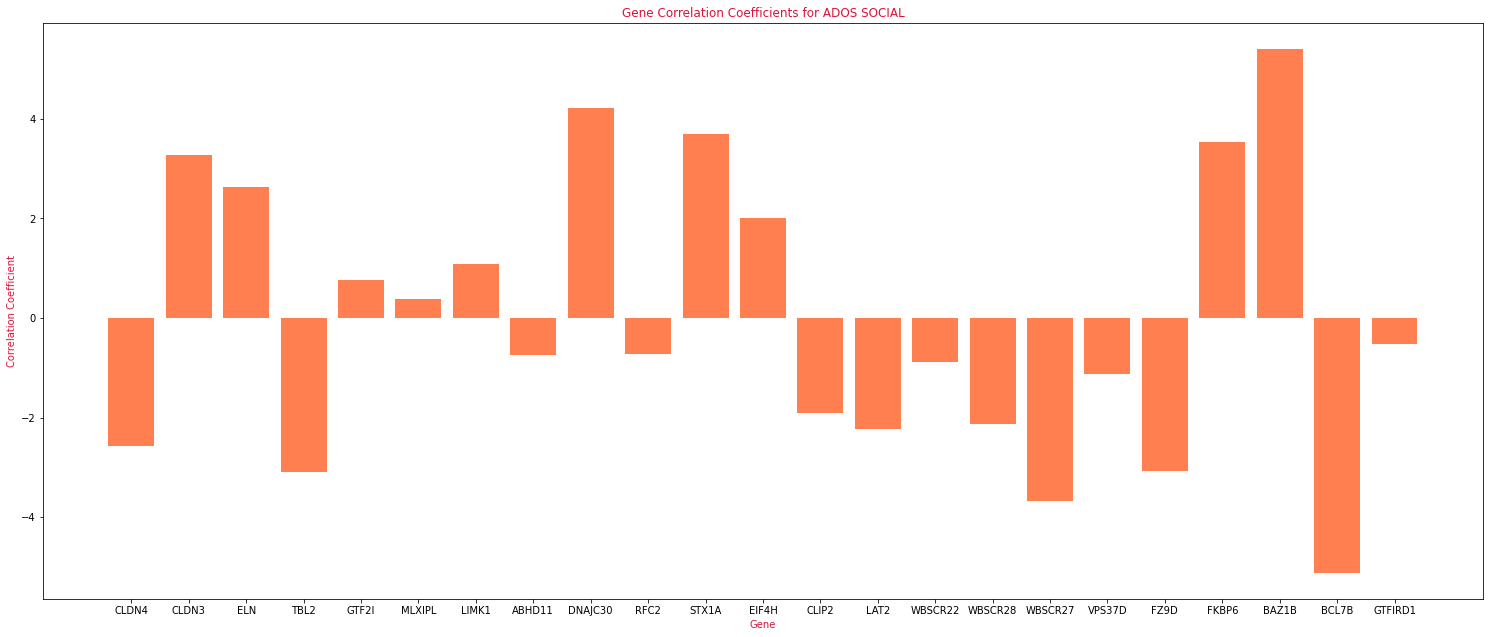

In [43]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='coral')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='crimson')
plt.ylabel('Correlation Coefficient',color='crimson')
plt.xlabel('Gene',color='crimson')
plt.show()

In [45]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,23):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

CLDN4,-1.4975862152960866
CLDN3,-0.44792593475713344
ELN,-0.9389442561237551
TBL2,-1.21557999972403
GTF2I,-0.11845753969234907
MLXIPL,0.8661512416476067
LIMK1,1.894257147714325
ABHD11,2.9893370147616407
DNAJC30,0.7066598264250844
RFC2,0.23017210353818665
STX1A,1.421969792561867
EIF4H,0.8346096849710005
CLIP2,-0.08582515018748271
LAT2,0.22687427546080421
WBSCR22,-0.5467240291857718
WBSCR28,0.03618994865086197
WBSCR27,-2.080799720996559
VPS37D,-1.4909167873589748
FZ9D,-2.0835373453365316
FKBP6,-1.6366464620003685
BAZ1B,1.526311634933583
BCL7B,-1.1968396466165758
GTFIRD1,-1.140607105495198


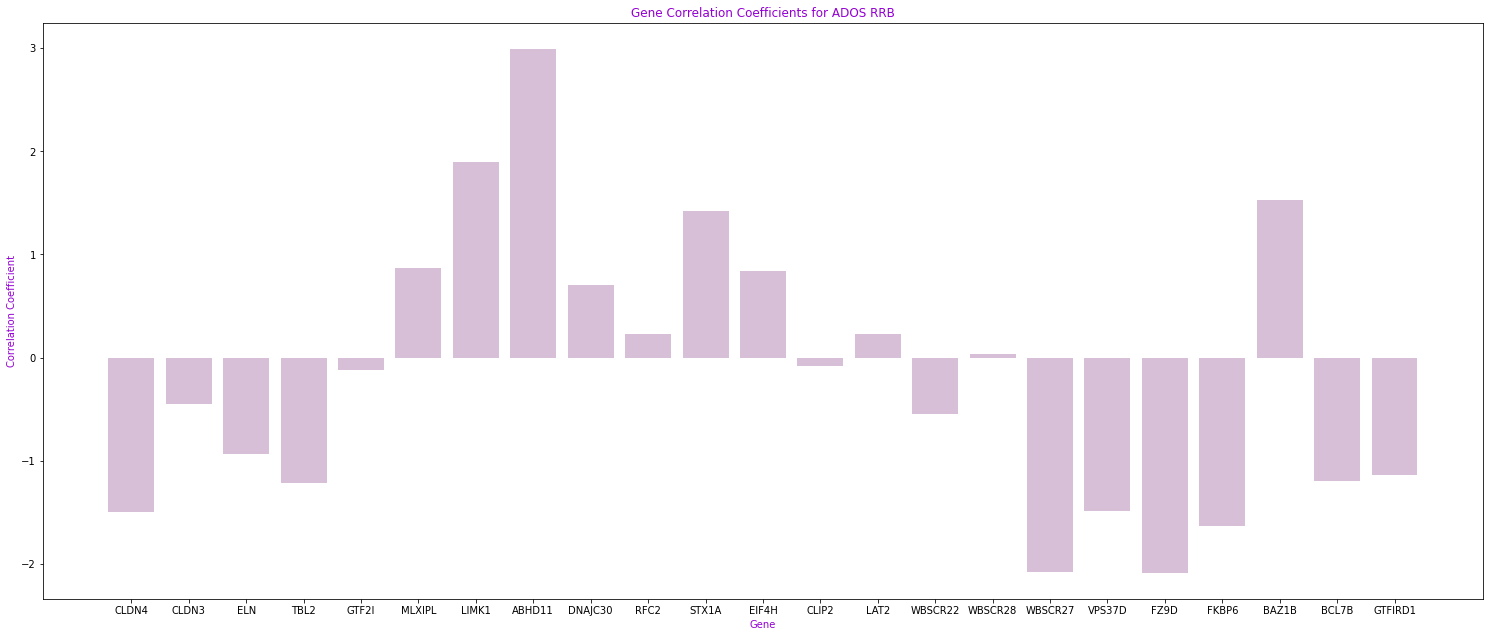

In [46]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='thistle')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='darkviolet')
plt.ylabel('Correlation Coefficient',color='darkviolet')
plt.xlabel('Gene',color='darkviolet')
plt.show()

In [47]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 24)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9158
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.577
Time:                        16:00:58   Log-Likelihood:                -1178.9
No. Observations:                 429   AIC:                             2406.
Df Residuals:                     405   BIC:                             2503.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1984   

In [48]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(20,8))
    plt.bar(xs_total,coef_total,color='thistle')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='indigo')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

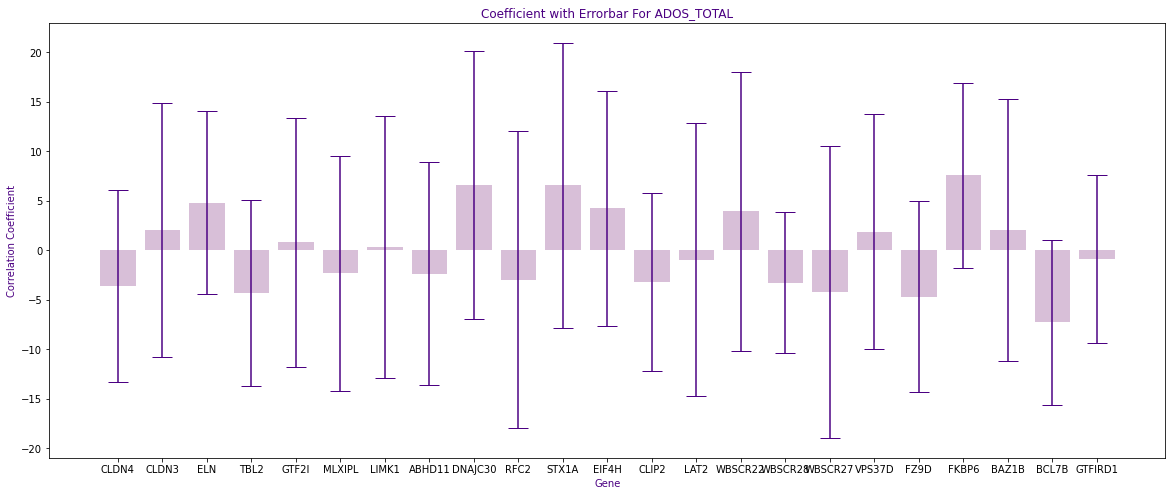

In [49]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')

In [50]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9323
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.555
Time:                        16:01:10   Log-Likelihood:                -763.53
No. Observations:                 411   AIC:                             1575.
Df Residuals:                     387   BIC:                             1672.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4977      0.129     27.10

In [51]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(20,8))
    plt.bar(xs_comm,coef_comm,color='lightgrey')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='darkslategray')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

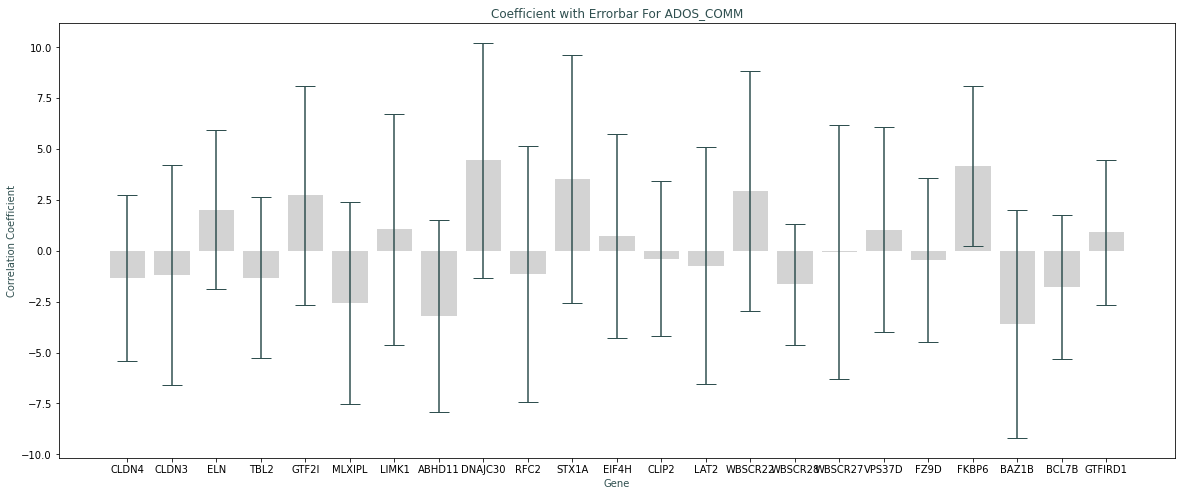

In [52]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='darkslategray')
plt.ylabel('Correlation Coefficient',color='darkslategray')
plt.xlabel('Gene',color='darkslategray')

In [53]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9259
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.564
Time:                        16:01:19   Log-Likelihood:                -987.26
No. Observations:                 412   AIC:                             2023.
Df Residuals:                     388   BIC:                             2119.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5697      0.221     34.

In [54]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(20,8))
    plt.bar(xs_social,coef_social,color='skyblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='steelblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

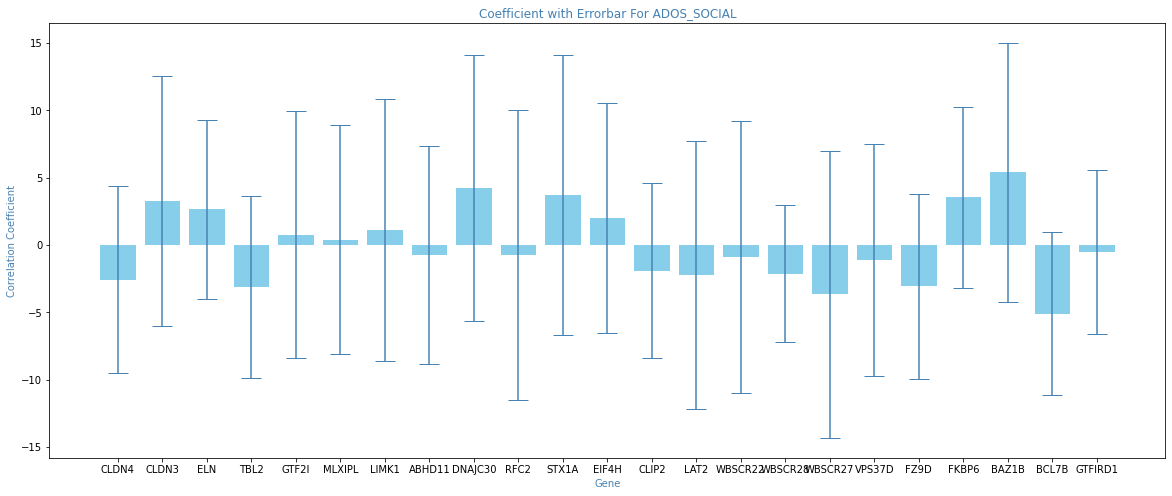

In [55]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='steelblue')
plt.ylabel('Correlation Coefficient',color='steelblue')
plt.xlabel('Gene',color='steelblue')

In [56]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8425
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.677
Time:                        16:01:28   Log-Likelihood:                -681.18
No. Observations:                 375   AIC:                             1410.
Df Residuals:                     351   BIC:                             1505.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8994      0.129     14.723

In [57]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(20,8))
    plt.bar(xs_rrb,coef_rrb,color='pink')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='mediumvioletred')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

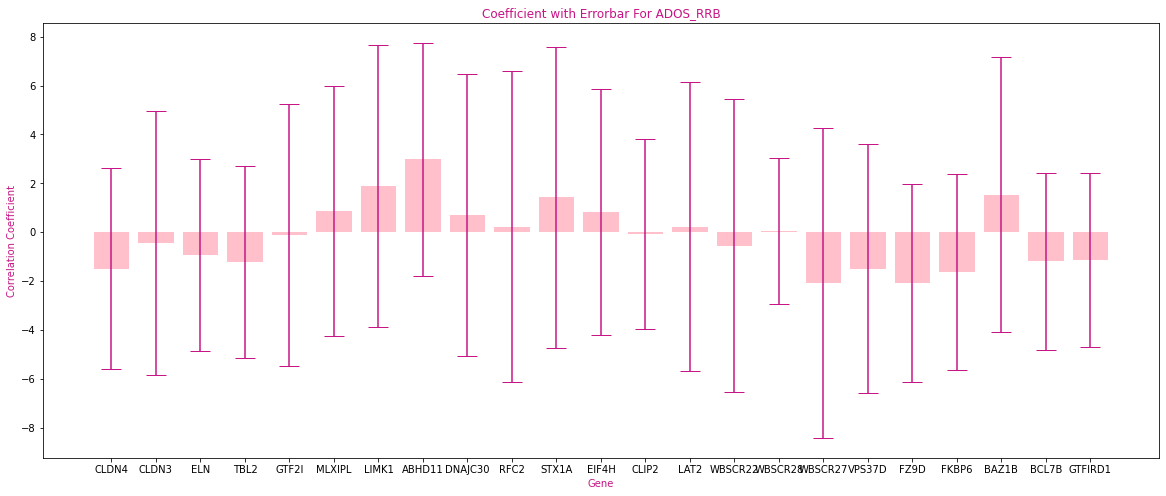

In [58]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='mediumvioletred')
plt.ylabel('Correlation Coefficient',color='mediumvioletred')
plt.xlabel('Gene',color='mediumvioletred')